/home/qy/software/anaconda3/envs/gluon/lib/python3.6/site-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


DataBatch: data shapes: [(32, 3, 256, 256)] label shapes: [(32, 1, 5)]
(1, 3, 256, 256)


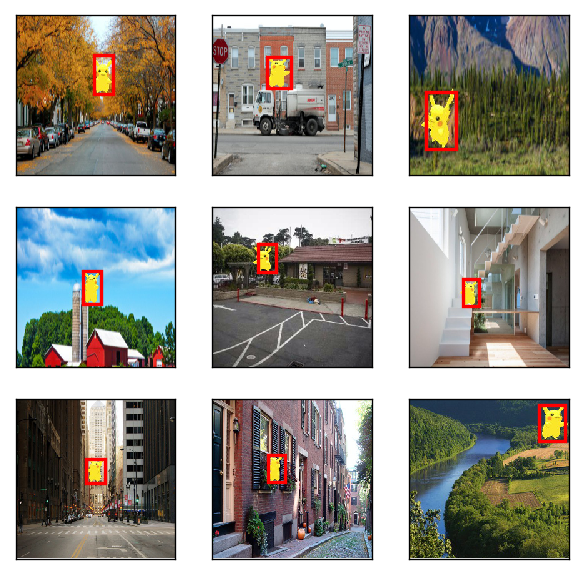

In [1]:
from mxnet import gluon
import mxnet as mx_net
import os
import numpy as np 
from mxnet import image
from mxnet import nd
from mxnet import init
from mxnet import cpu
import matplotlib as _plotlib
import matplotlib.pyplot as _pyplot
from mxnet.contrib.ndarray import MultiBoxPrior
from mxnet.gluon import nn
from mxnet.contrib.ndarray import MultiBoxDetection
ctx = mx_net.cpu()

%matplotlib inline
_plotlib.rcParams['figure.dpi']= 120

shape_dataset = 256
date_batch_size = 32
mean_rgb_value = nd.array([123, 117, 104])
root_url = ('https://apache-mxnet.s3-accelerate.amazonaws.com/'
            'gluon/dataset/pikachu/')
data_dir = '../data/pikachu/'
dataset = {'train.rec': 'e6bcb6ffba1ac04ff8a9b1115e650af56ee969c8',
          'train.idx': 'dcf7318b2602c06428b9988470c731621716c393',
          'val.rec': 'd6c33f799b4d058e82f2cb5bd9a976f69d72d520'}
#获取训练数据
def iterators_get(shape_dataset, date_batch_size):
    NamesOfClass = ['pikachu'] #类名称
    NumOfClass = len(NamesOfClass)#类的个数
    Train_iterators = image.ImageDetIter(
        batch_size=date_batch_size,
        data_shape=(3, shape_dataset, shape_dataset),#3*256*256
        path_imgrec=data_dir+'train.rec',
        path_imgidx=data_dir+'train.idx',
        shuffle=True,
        mean=True,
        rand_crop=1,
        min_object_covered=0.95,
        max_attempts=200)
    Val_iterators = image.ImageDetIter(
        batch_size=date_batch_size,
        data_shape=(3, shape_dataset, shape_dataset),
        path_imgrec=data_dir+'val.rec',
        shuffle=False,
        mean=True)
    return Train_iterators, Val_iterators, NamesOfClass, NumOfClass

TrainData, TestData, NamesOfClass, NumOfClass = iterators_get(
    shape_dataset, date_batch_size)
def RectBox(Box_Rectangle, color, linewidth=3):
    """convert an anchor Box_Rectangle to a matplotlib rectangle"""
    Box_Rectangle = Box_Rectangle.asnumpy()
    return _pyplot.Rectangle(
        (Box_Rectangle[0], Box_Rectangle[1]), Box_Rectangle[2]-Box_Rectangle[0], Box_Rectangle[3]-Box_Rectangle[1],
        fill=False, edgecolor=color, linewidth=linewidth)

batch_test = TrainData.next()
print(batch_test)
print((batch_test.data[0][0:1]).shape)
_, figs = _pyplot.subplots(3, 3, figsize=(6,6))
for i in range(3):
    for j in range(3):        
        img, labels = batch_test.data[0][3*i+j], batch_test.label[0][3*i+j]
        # (3L, 256L, 256L) => (256L, 256L, 3L)
        img = img.transpose((1, 2, 0)) + mean_rgb_value
        img = img.clip(0,255).asnumpy()/255
        fig = figs[i][j]
        fig.imshow(img)
        for label in labels:
            rect = RectBox(label[1:5]*shape_dataset,'red',2)
            fig.add_patch(rect)                    
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
_pyplot.show()